#  1. Overwiev and Preparation
We want to apply Filters to our images and see if different applied filters have an influence on  the success of our clustering




### 1.1 Import Libraries

In [7]:
# Import Required Libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt



### 1.2 Import Custom Functions for Data Preparation

In [8]:
# Import custom functions
from Functions.Datenvorbereitung import apply_gaussian_filter 
from Functions.Datenvorbereitung import display_images
from Functions.Datenvorbereitung import save_image










### 1.3 Load Original Images


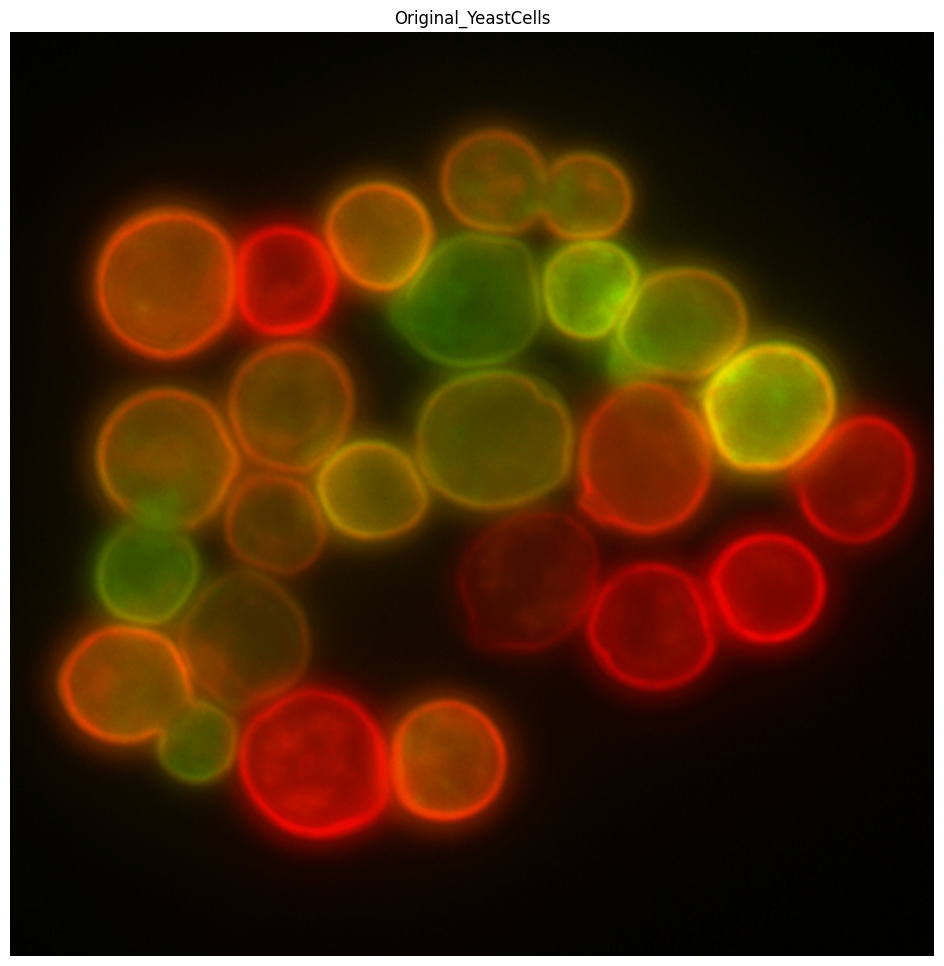

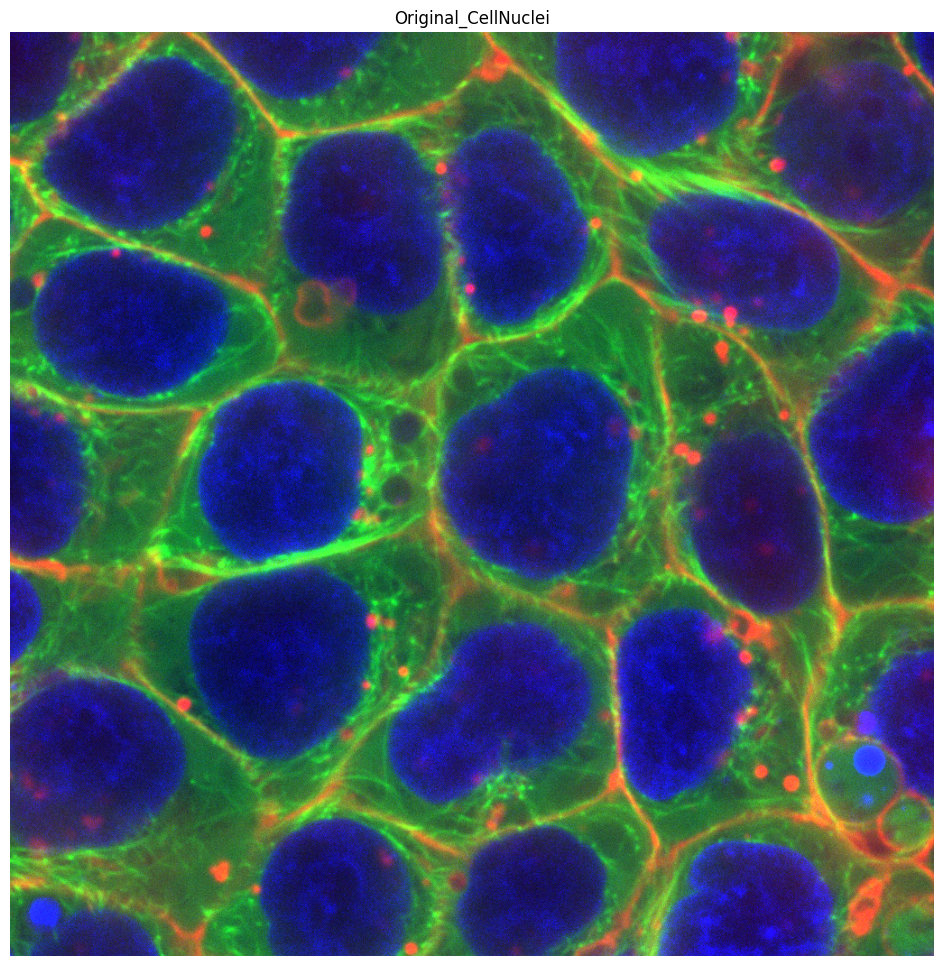

In [9]:
YeastCells = np.copy(plt.imread('Original_Images/Clustering/Data/Yeast_Cells.jpg'))

CellNuclei = np.copy(plt.imread('Original_Images/Clustering/Data/Cell_Nuclei.tif'))

display_images(YeastCells, "Original_YeastCells")
display_images(CellNuclei, "Original_CellNuclei")




# 2. Image Filtering
We want to apply Filters to our images and see if different applied filters have an influence on  the success of our clustering.  
We are using different filters and approaches for each kind of image depending on our goal. There is no guarantee that the aapporoch is the best/correct for the image since its our first time doing this.  
Our goal here is to showcase different filters, whats their influence on our image and how they work.  
In the evaluation and final presentation we will discuss how good each approach was.
More details about our thoughts and why we use the filters were thouroughly discussed in the project proposal.

### Fluorecent Yeast Cells
One thing we want to try on the fluorescent yeast cell image is to reduce the halos around the cells using different filters.  
We will perform k-means clustering after application of the filters and the original image, then conclude the dice score to see ife filters influende the clustering process.

## 2.1 Gauß Filter

A **Gaussian filter** is used to blur (smooth) an image by reducing noise and detail. It works by ittrereting over every pixel a small matrix (kernel) whose values follow a 2D Gaussian (bell-curve) distribution:

- **Kernel shape**: A square grid (e.g. 3×3, 5×5) where the center has the highest weight and the weights fall off towards the edges.
- **Convolution**: For each pixel, multiply the surrounding pixels by the corresponding kernel weights and sum them up. This replaces the original pixel with a weighted average of its neighborhood.
- **σ (sigma)**: Controls the “spread” of the bell curve. A larger σ produces stronger blurring (more smoothing), while a smaller σ keeps more detail.
- **Benefits**:  
  - Smooths away high-frequency noise  
  - Preserves overall image structure  
  - Often used as a preprocessing step for edge detection or image enhancement

Mathematically, the 2D Gaussian kernel is defined as:

$$
G(x, y) = \frac{1}{2 \pi \sigma^2} \exp\!\Bigl(-\frac{x^2 + y^2}{2 \sigma^2}\Bigr)
$$

where \(x\) and \(y\) are the horizontal and vertical distances from the kernel center.

### 2.1.1 Apply Gauß-Filter to arbitrary Image



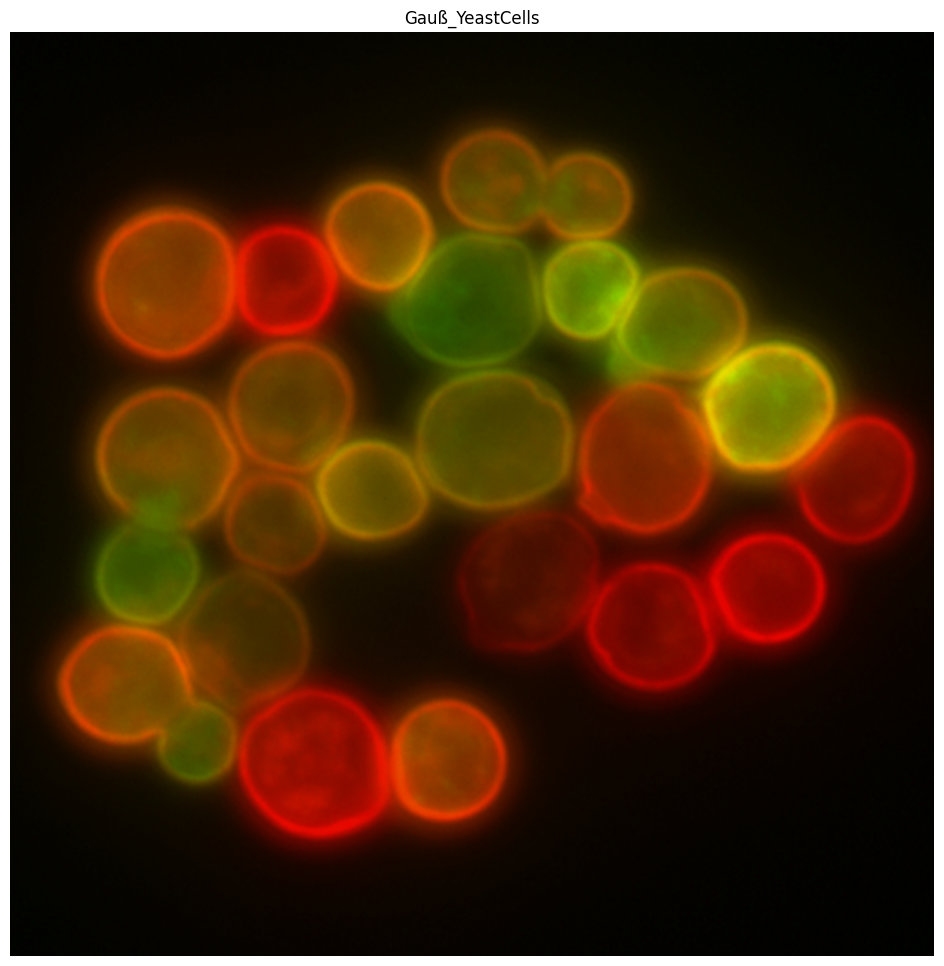

In [10]:

#########################################
input_path = "Original_Images/Clustering/Data/Yeast_Cells.jpg"  
kernel_size = 5
#########################################


x = apply_gaussian_filter(input_path, kernel_size)
blurred_image = x[1]  # Access the second element of the tuple

display_images(blurred_image, "Gauß_YeastCells")






### 2.1.2 Safe arbitraty image to downloads

With this function we can safe our filtered images (or other images) to our local "downloads" folder

In [ ]:
 #    save_image(blurred_image, "Gauß_YeastCells", ext= "jpeg")

## 2.2 Bilateral Filter

A **bilateral filter** smooths an image while keeping edges sharp by combining two ideas:

1. **Distance weight**: pixels closer to the center count more.  
2. **Color weight**: pixels with similar color count more.

Both weights are Gaussian functions:

- **Spatial term**  
  $$
  w_s(k,\ell) = \exp\left(-\frac{k^2 + \ell^2}{2\sigma_s^2}\right)
  $$  
  - k, ℓ: offsets in the window (e.g. for a 5×5 kernel, k, ℓ ∈ {−2,−1,0,1,2})  
  - σₛ: controls how fast the distance weight falls off (larger σₛ = wider reach)

- **Range term**  
  $$
  w_r = \exp\left(-\frac{(I(i,j) - I(i+k,j+\ell))^2}{2\sigma_r^2}\right)
  $$  
  - I(i,j): pixel intensity (or color value) at position (i,j)  
  - σᵣ: controls how much color difference is tolerated (larger σᵣ = more smoothing across color boundaries)

The output pixel value at (i,j) is the weighted average of its neighbors:

$$
I_{\text{out}}(i,j)
= \frac{1}{W(i,j)}
\sum_{k=-K}^{K} \sum_{\ell=-K}^{K}
w_s(k,\ell)\cdot w_r \cdot I(i+k,j+\ell)
$$

With normalization factor:

$$
W(i,j)
= \sum_{k=-K}^{K} \sum_{\ell=-K}^{K}
w_s(k,\ell)\cdot w_r
$$

- **Kernel size**: (2K+1) × (2K+1)  
- σₛ (spatial sigma): how far the filter reaches in space  
- σᵣ (range sigma): how much color difference is allowed

**Why use it?**  
- Removes noise in smooth regions  
- **Keeps edges and fine details**  
- Ideal preprocessing for segmentation or feature extraction


## 2.2 Bilateral Filter

A **bilateral filter** smooths an image while keeping edges sharp by combining two ideas:

1. **Distance weight**: pixels closer to the center count more.  
2. **Color weight**: pixels with similar color count more.

Both weights are Gaussian functions:

- **Spatial term**  
  $$
  w_s(k,\ell) = \exp\left(-\frac{k^2 + \ell^2}{2\,\sigma_s^2}\right)
  $$  
  - $k,\ell$: offsets in the window (e.g. for a 5×5 kernel, $$k,\ell \in \{-2,-1,0,1,2\}$$)  
  - $\sigma_s$: controls how fast the distance weight falls off (larger $\sigma_s$ = wider reach)

- **Range term**  
  $$
  w_r = \exp\left(-\frac{[I(i,j) - I(i+k,j+\ell)]^2}{2\,\sigma_r^2}\right)
  $$  
  - $I(x,y)$: original pixel intensity (or color channel) at $$(x,y)$$  
  - $\sigma_r$: controls how fast the color weight falls off (larger $\sigma_r$ = include more different colors)

The output pixel value at $$(i,j)$$ is the weighted average of its neighbors:

$$
I_{\text{out}}(i,j)
= \frac{1}{W(i,j)}
\sum_{k=-K}^{K}\sum_{\ell=-K}^{K}
w_s(k,\ell)\cdot w_r \cdot I(i+k,j+\ell)
$$

with the normalizing factor:

$$
W(i,j)
= \sum_{k=-K}^{K}\sum_{\ell=-K}^{K}
w_s(k,\ell)\cdot w_r
$$

- **Kernel size**: $$(2K+1) \times (2K+1)$$  
- $\sigma_s$ (spatial sigma): controls how far the smoothing extends  
- $\sigma_r$ (range sigma): controls how much color difference is tolerated

**Why use it?**  
- Removes noise in flat regions  
- **Keeps edges and small details**  
- Great preprocessing for segmentation or feature extraction
